# Exploratory Data Analysis

## Read admissions file

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')


admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


## Total number of admissions

In [3]:
admissionsDf[['PATIENT_ID', 'EPISODE_ID']].drop_duplicates().shape

(123845, 2)

## Time between patient admission and time of organism first noted

In [7]:
admissionsDf["start_date"] = pd.to_datetime(admissionsDf["start_date"])
admissionsDf["Organism_FIRST_NOTED"] = pd.to_datetime(admissionsDf["Organism_FIRST_NOTED"])

<Axes: >

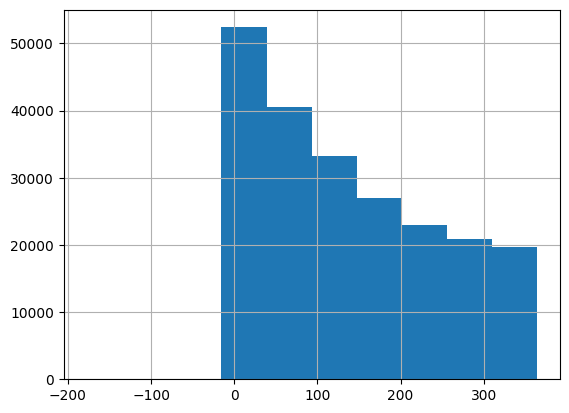

In [22]:
(admissionsDf.Organism_FIRST_NOTED - admissionsDf.start_date).dt.days.hist()

<Axes: >

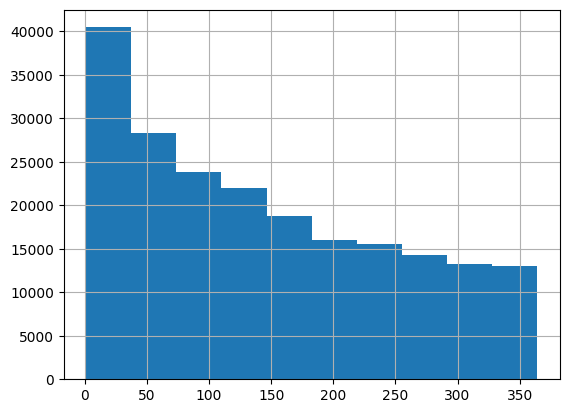

In [21]:
(admissionsDf.Organism_FIRST_NOTED - admissionsDf.start_date).dt.days.apply(lambda x: x if ((x > 0)) else None).hist()

<Axes: >

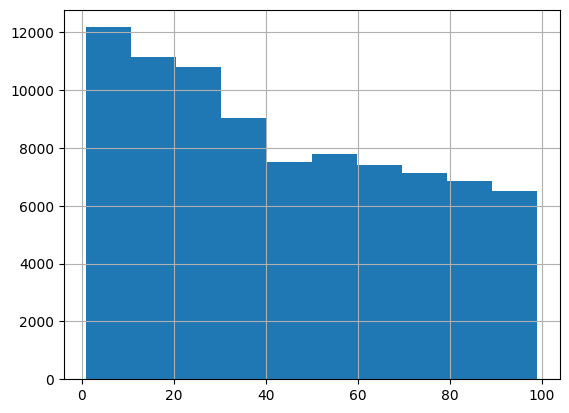

In [20]:
(admissionsDf.Organism_FIRST_NOTED - admissionsDf.start_date).dt.days.apply(lambda x: x if ((x > 0) and (x < 100)) else None).hist()

## Read vitals file

In [1]:
import os
from pathlib import Path


extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [3]:
import pandas as pd

vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
round(vitalsDf[vitalsDf.concept_name == 'Temperature'][['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0]/vitalsDf[['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0] * 100, 2)

87.69

In [5]:
round(vitalsDf[vitalsDf.concept_name == 'Oral temperature'][['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0]/vitalsDf[['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0] * 100, 2)

11.67

In [6]:
vitalsDf[(vitalsDf.concept_name == 'Oral temperature')]

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
6030310,29225699,12665428,2155808,2019-09-13 17:43:41,Oral temperature,37.0
6030311,29347851,12665428,2155808,2019-09-15 15:14:03,Oral temperature,36.8
6030312,19008800,12932394,2155178,2019-10-18 08:37:17,Oral temperature,36.3
6030313,31828576,12932394,2155178,2019-10-18 14:24:09,Oral temperature,36.2
6030314,29450333,12665428,2155808,2019-09-16 16:07:47,Oral temperature,36.4
...,...,...,...,...,...,...
13440004,64187770,14460357,2452275,2021-03-19 08:29:22,Oral temperature,36.8
13440005,64194280,14460357,2452275,2021-03-19 05:00:49,Oral temperature,36.7
13440006,64194528,14460357,2452275,2021-03-19 06:03:38,Oral temperature,36.7
13440007,37340781,13109362,2033525,2020-01-03 23:14:55,Oral temperature,37.7


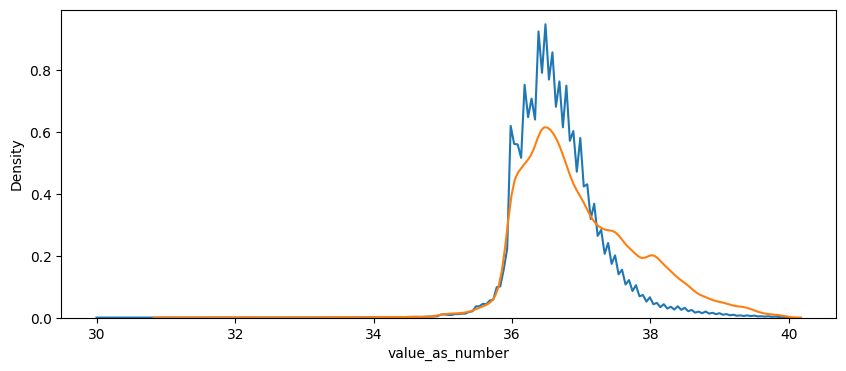

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,4))

sns.kdeplot(data=vitalsDf[(vitalsDf.concept_name == 'Temperature') & (vitalsDf.value_as_number > 30) & (vitalsDf.value_as_number < 40)], x="value_as_number", ax=ax)
sns.kdeplot(data=vitalsDf[(vitalsDf.concept_name == 'Oral temperature') & (vitalsDf.value_as_number > 30) & (vitalsDf.value_as_number < 40)], x="value_as_number", ax=ax)

# Show the plot
plt.show()

In [9]:
vitalsDf.loc[(vitalsDf.concept_name == 'Oral temperature'), 'concept_name'] = 'Temperature'
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [10]:
round(vitalsDf[vitalsDf.concept_name == 'Temperature'][['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0]/vitalsDf[['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0] * 100, 2)

88.23

In [11]:
round(vitalsDf[vitalsDf.concept_name == 'Oral temperature'][['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0]/vitalsDf[['visit_occurrence_id', 'person_id']].drop_duplicates().shape[0] * 100, 2)

0.0